## TPS1&2 second level models modulated by emotional and habitual social media use


### Import modules


In [11]:
%matplotlib inline

from nilearn import plotting, regions, image, input_data
import os
from scipy import stats
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.stats import norm
import seaborn as sns

from nistats.second_level_model import SecondLevelModel
from nistats.design_matrix import make_second_level_design_matrix
from nistats.reporting import plot_design_matrix, get_clusters_table
from nistats.thresholding import map_threshold

import pandas as pd
import nibabel as nb
import numpy as np
import copy


## Functions

In [53]:
## function to plot second level models
def plot_second_level(subjs, df,param_var, con_files, display_mode, plot = True):
    df_design = df[['Scan_ID',param_var]]
    df_design = df_design[-df_design.isnull().any(axis=1)]
    df_design = df_design.rename(columns={'Scan_ID': 'subject_label'})
    df_design = df_design[df_design.subject_label.isin(subjs)]
    
    design_matrix = make_second_level_design_matrix(df_design.subject_label,df_design)
    
    # plot the design matrix
#     fig,fax = plt.subplots(figsize=(10,10))
#     ax = plot_design_matrix(design_matrix, rescale=True, ax=fax)
#     ax.set_title('Second level design matrix for' + param_var, fontsize=16)
#     ax.set_ylabel('maps')
#     ax.tick_params(labelsize=12)
    
    con_files = [p for p in con_files if p.split('/')[6] in df_design.subject_label.values]
    
    second_level_model = SecondLevelModel()
    second_level_model = second_level_model.fit(con_files,design_matrix=design_matrix)

    T3 = second_level_model.compute_contrast(second_level_contrast=param_var, output_type="stat")
    
    if plot:
        print(plotting.plot_stat_map(T3,threshold =0,
                                    title = 'Pmod: ' + param_var + " (uncorrected)",
                                    display_mode = display_mode))
        #plt.show()
        #plt.cla()

    return(T3)


def plot_second_pmod(subjs, df,param_var, con_files, display_mode, plot = True):
    ## Plot uncorrected map
    T3_map = plot_second_level(subjs, df,param_var, con_files, display_mode, plot)
    ## Plot corrected map
    T3_map_thresholded, threshold = map_threshold(stat_img=T3_map, 
                                       mask_img=None, alpha=0.05, 
                                       height_control='fpr', cluster_threshold = 25, two_sided=True)


    print("Threshold after controlling for FPR at 0.05 level is: " + str(round(threshold,2)))



    display = plotting.plot_stat_map(T3_map_thresholded, 
                           title = 'Pmod: ' + param_var+ " (fpr corrected)",
                                    threshold = threshold, display_mode = display_mode)
    plotting.show()
    return(T3_map)

### Setting parameters

In [63]:
# Parameter file
df = pd.read_csv('/data00/jupyterhub/rpei@asc.upenn.edu/socialMedia/SPM_secondLevelModel/cyber_1_2_old/facebook.csv')
# Brain data directory
data_dir = '/data00/projects/tps1_2_cyber_old/data'
first_level_model='/data00/projects/tps1_2_cyber_old/data/subjs/{}/model/model_cyberball/{}'
bad_subjs = []

In [64]:
subjects = [ "110726ss",      "110725bb",      "110730zb",      "110730gp",     
             "110814gb",      "110814ld",      "110731te",      "110805jl",     
             "110815jg",      "110820aq",      "110824ks",      "110812jd",     
             "110827dt",      "110925ml",      "110918ms",      "110924pl",     
             "111008jg",      "111030me",      "111030am",      "111029jg",     
             "110623jr",      "110725pr",      "110722cr",      "120731ta",     
             "120714mm",      "120714bl",      "120801lh",      "120729oc",     
             "120812ah",      "120831dl",      "120815sa",      "120826so",     
             "120828kz",      "120831nw",      "ebf10dis00033", "ebf10dis00035",
             "ebf10dis00038", "ebf10dis00039", "ebf10dis00045", "ebf10dis00048",
             "ebf10dis00049", "ebf10dis00050", "ebf10dis00053", "ebf10dis00055",
             "ebf10dis00056", "ebf10dis00058", "ebf10dis00061", "ebf10dis00062",
             "ebf10dis00063", "ebf10dis00064", "ebf10dis00065", "ebf10dis00067",
             "ebf10dis00069", "ebf10dis00072", "ebf10dis00074", "ebf10dis00076",             
             "ebf10dis00078", "ebf10dis00079", "ebf10dis00080"]

print("we have " + str(len(subjects)) + " participants.")
con_files = [first_level_model.format(s, 'con_0006.hdr') for s in subjects]

we have 59 participants.


### Inspect individual maps

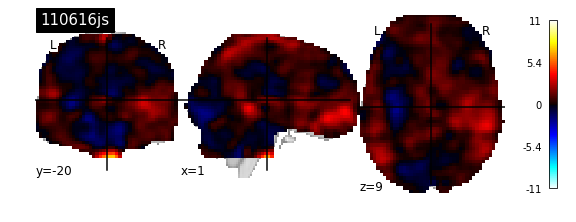

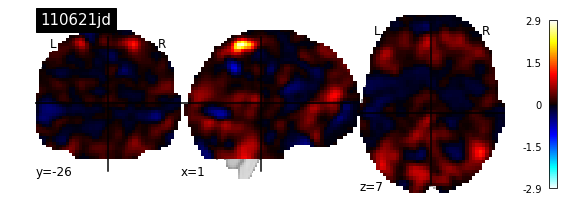

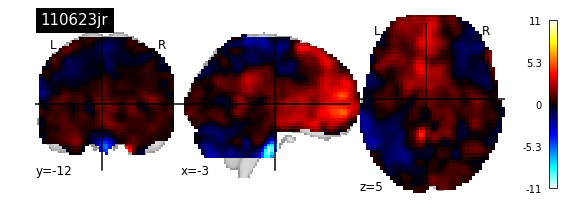

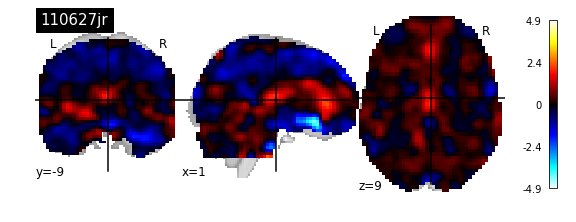

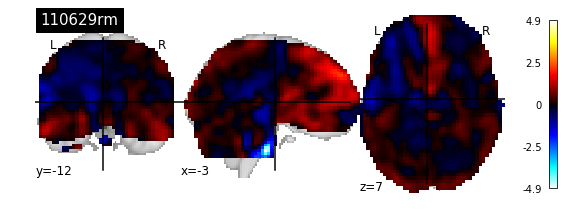

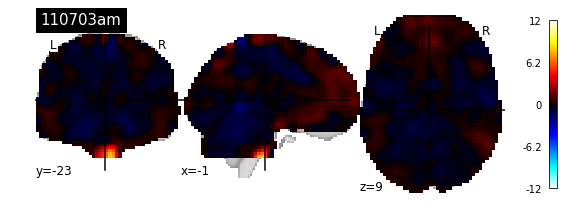

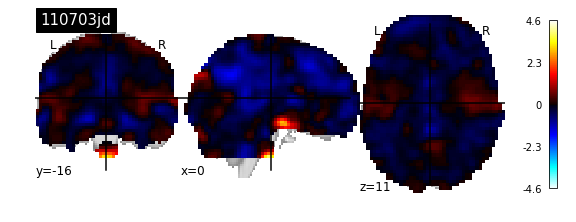

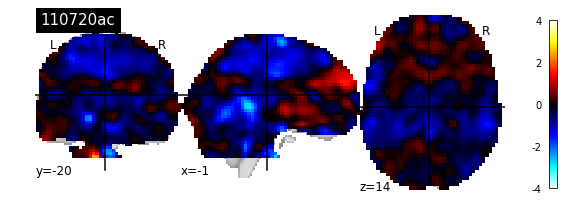

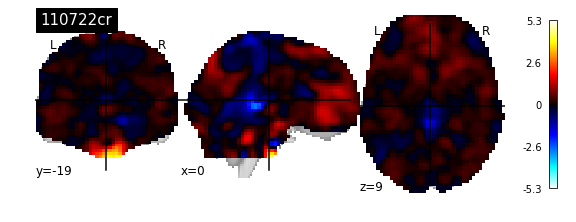

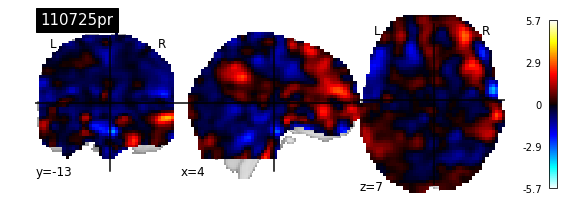

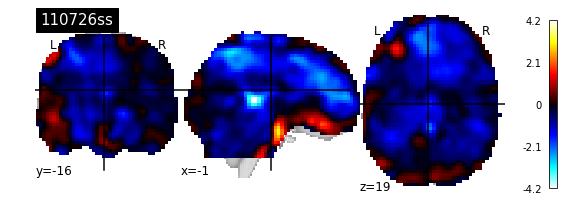

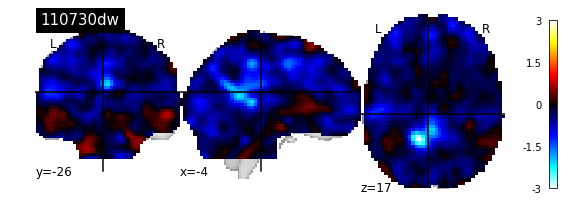

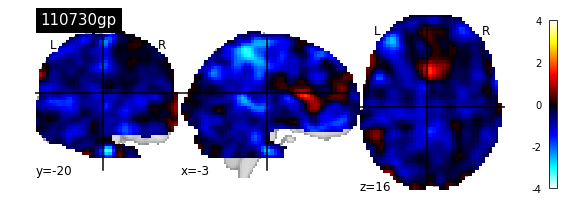

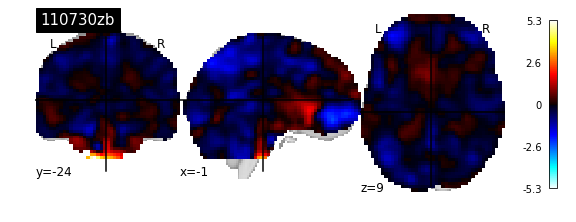

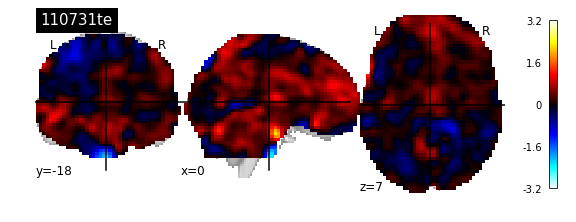

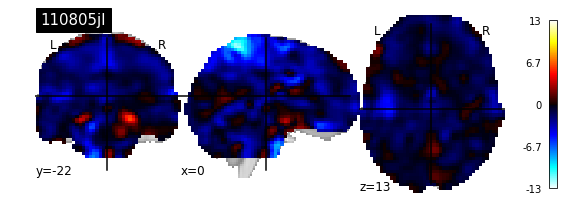

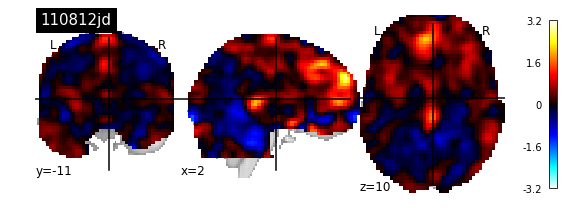

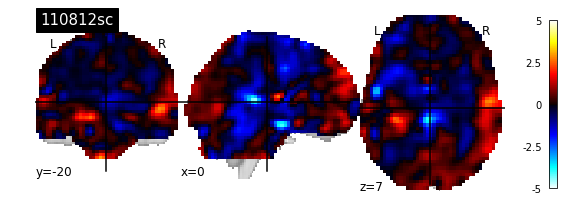

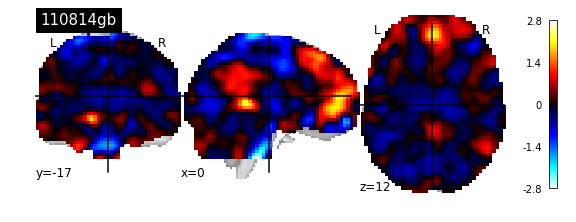

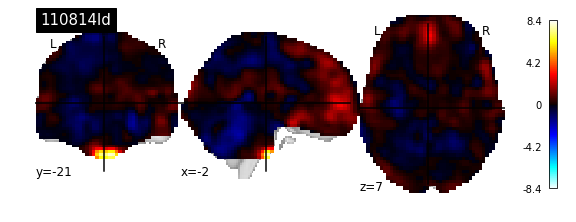

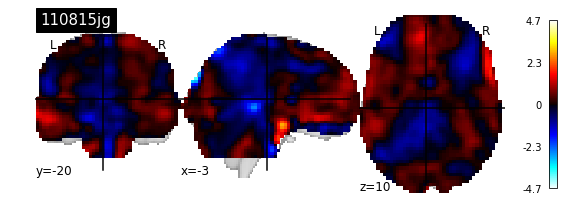

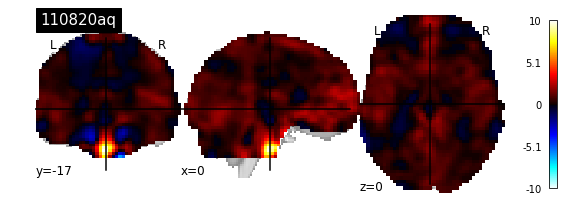

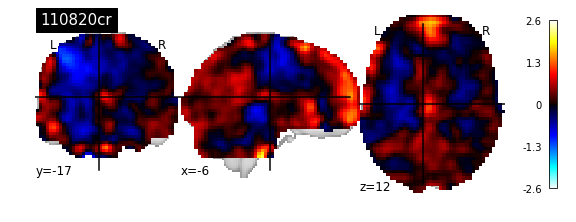

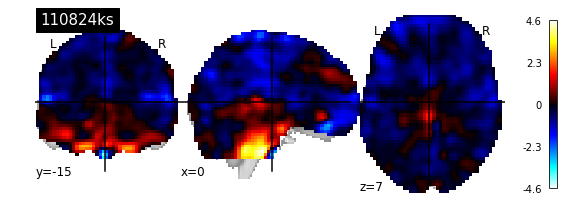

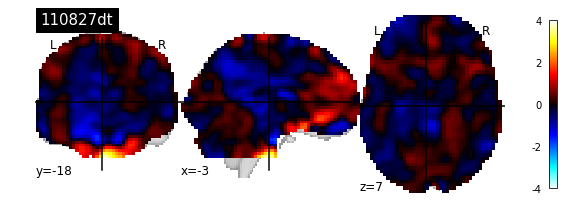

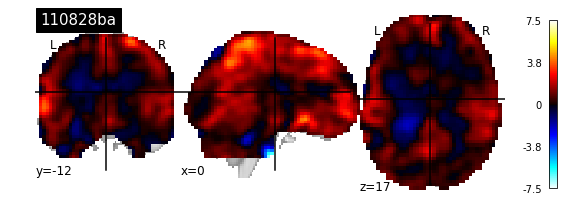

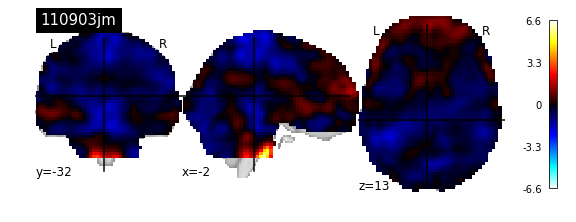

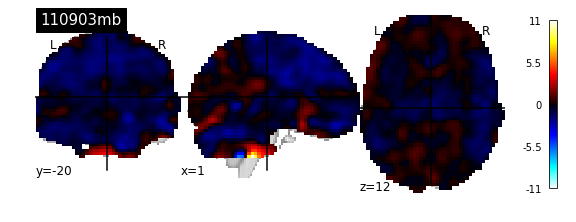

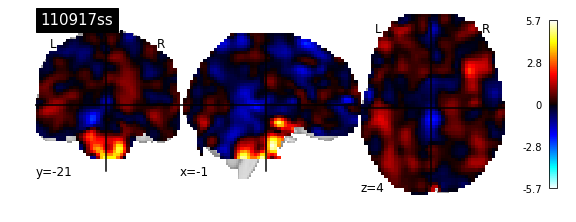

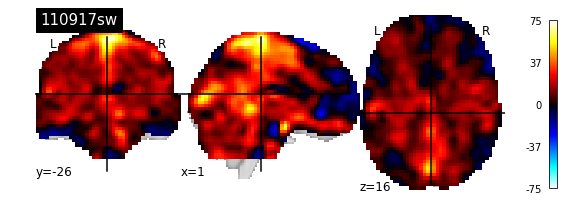

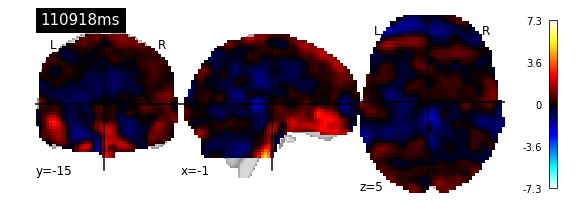

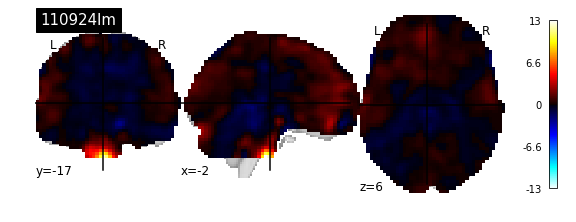

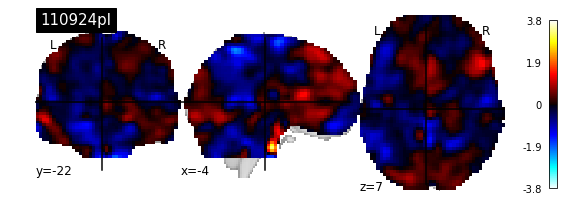

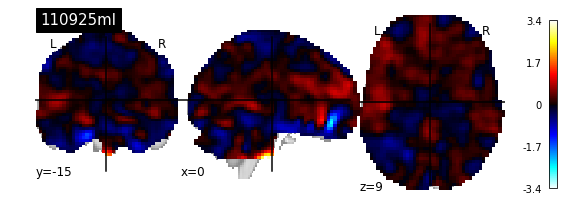

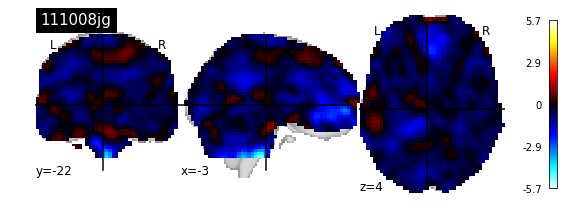

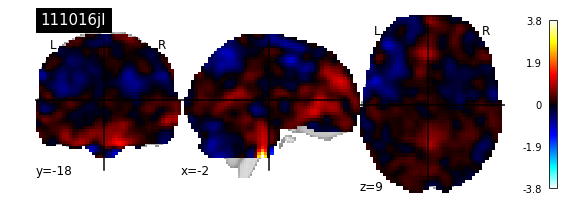

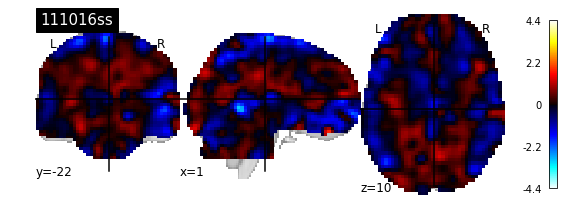

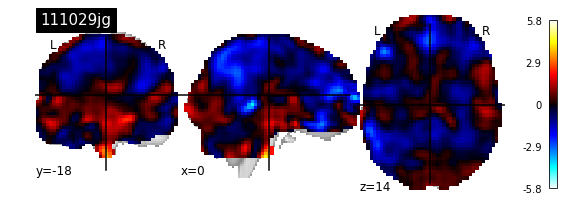

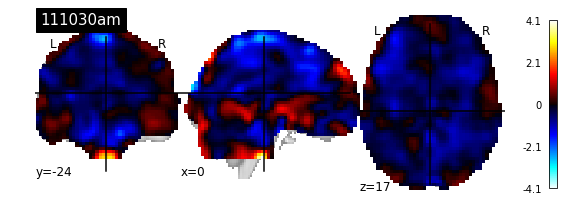

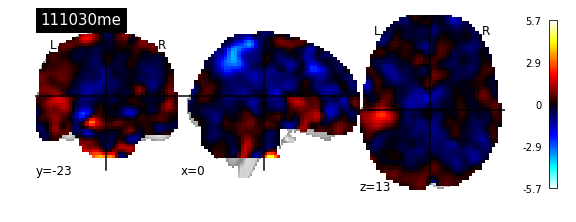

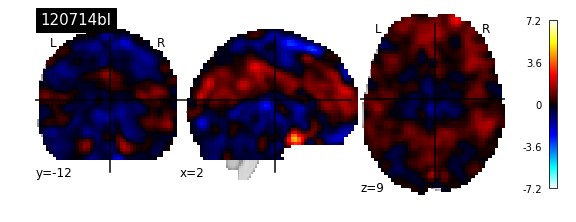

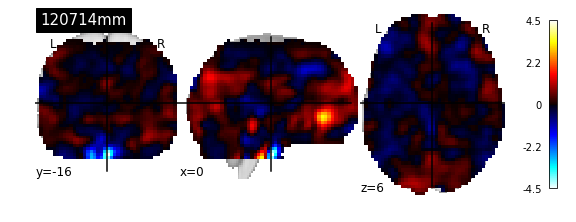

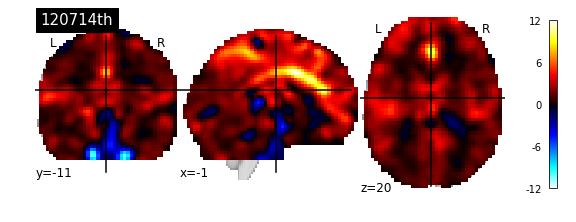

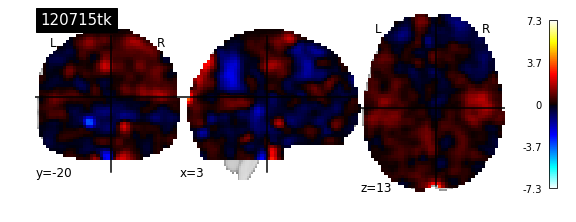

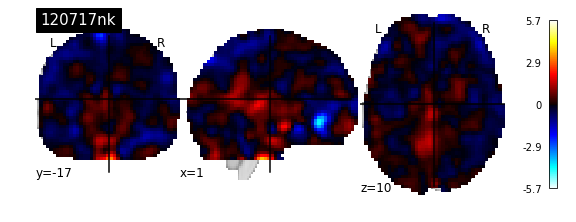

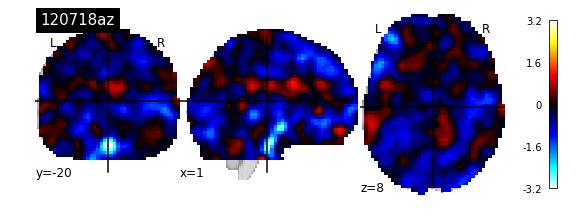

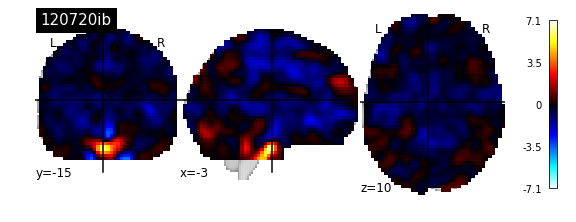

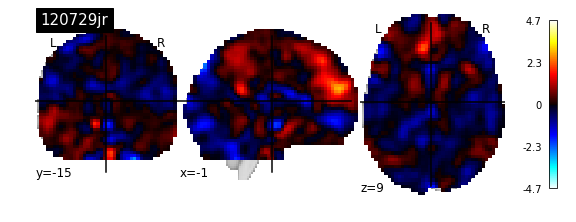

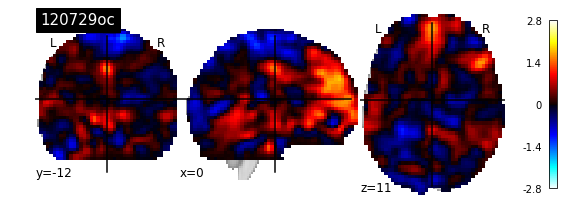

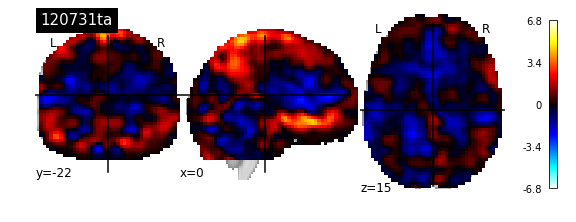

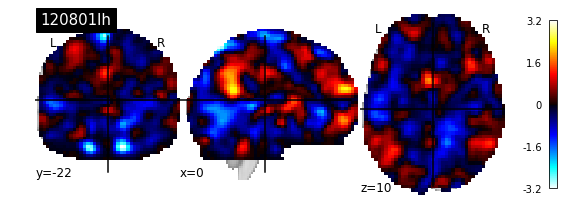

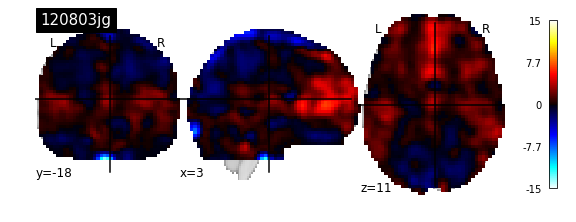

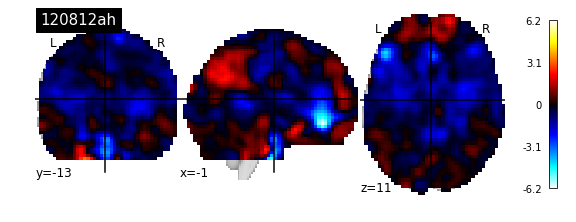

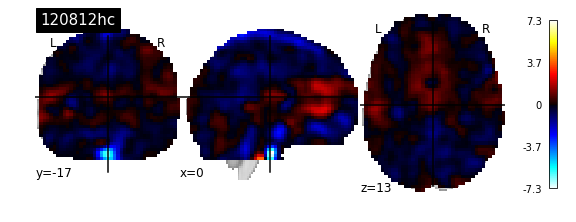

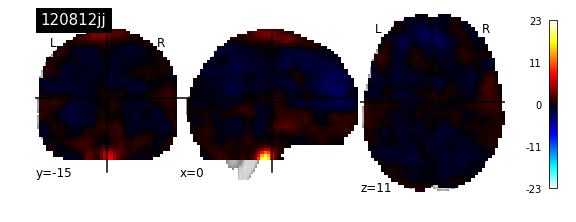

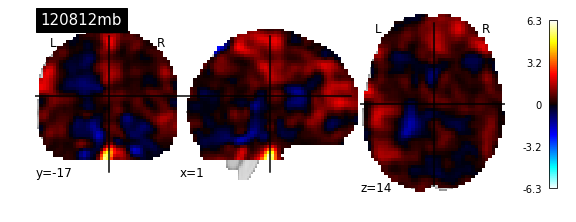

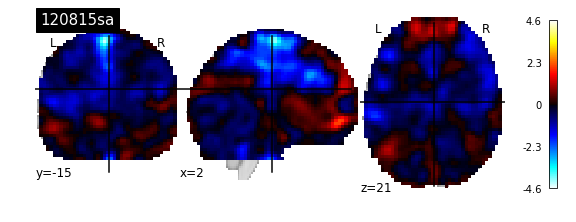

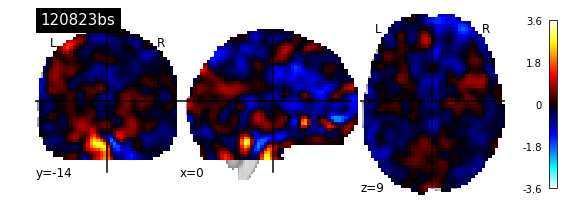

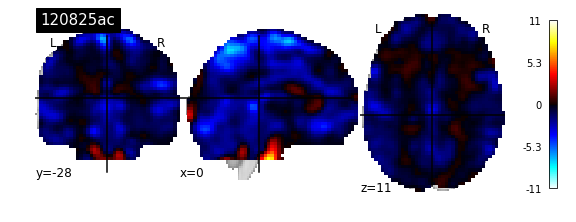

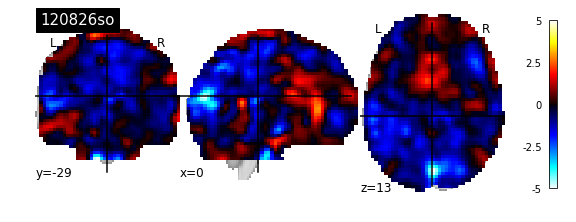

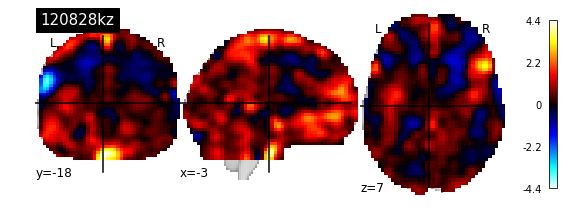

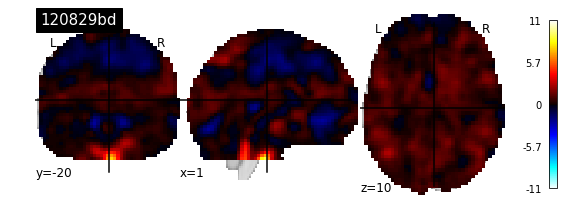

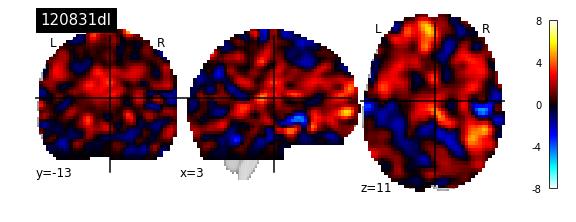

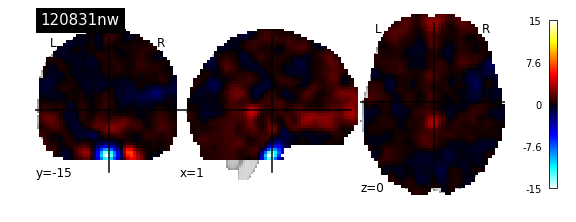

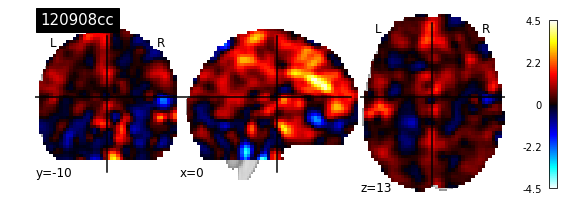

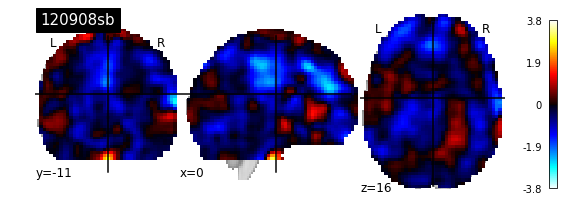

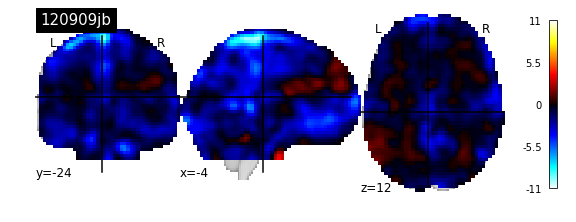

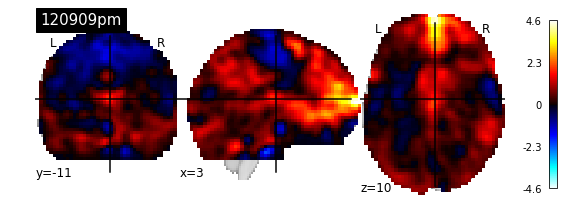

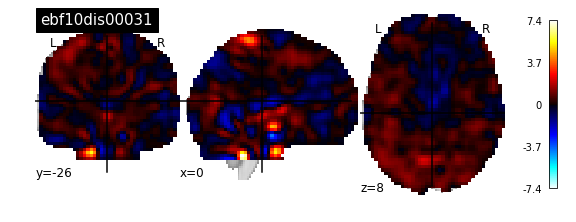

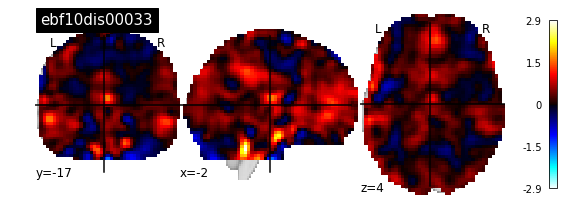

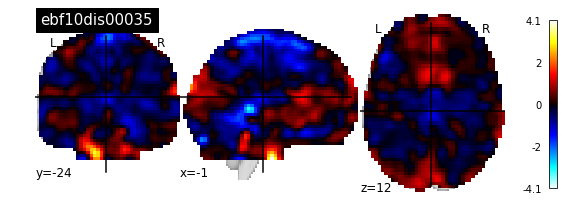

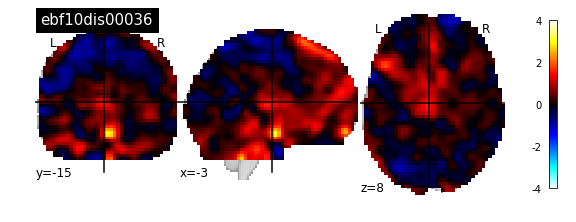

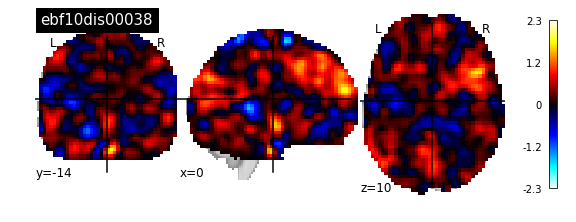

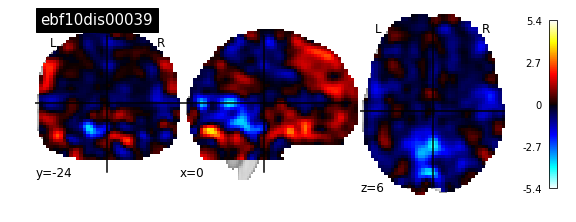

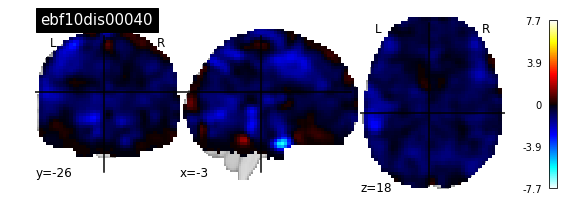

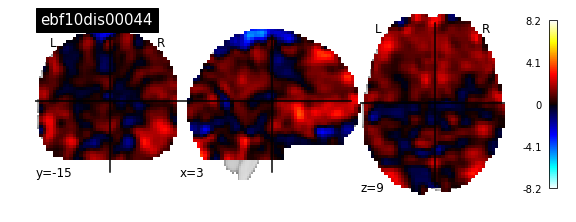

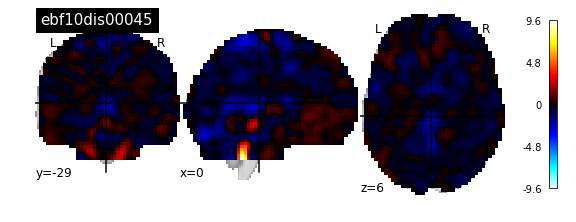

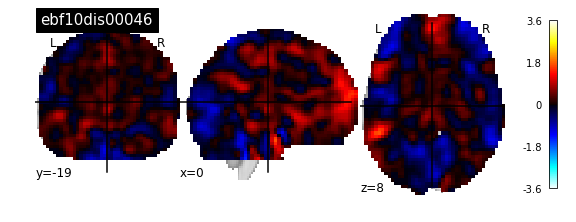

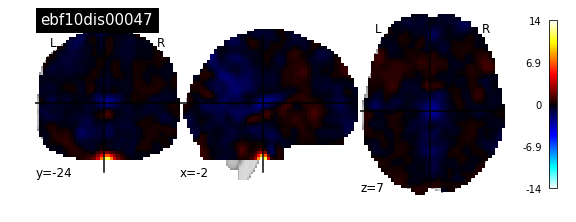

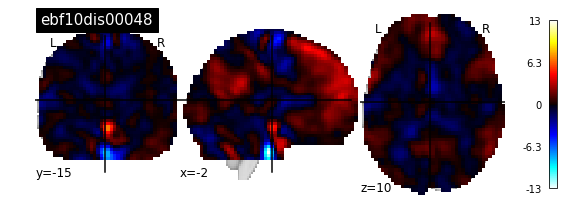

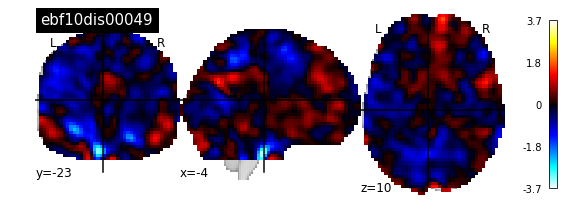

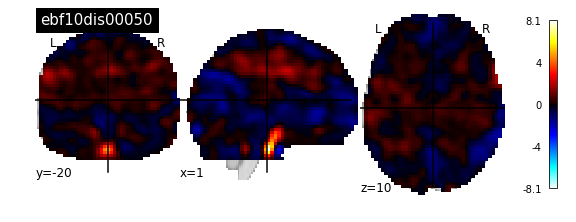

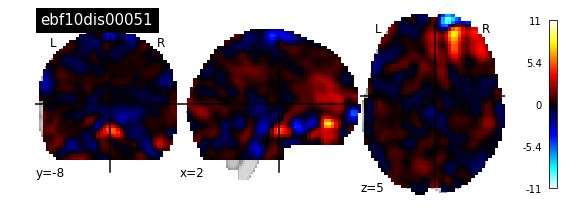

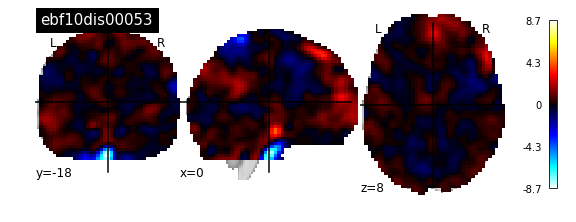

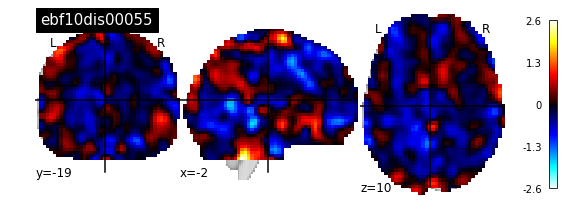

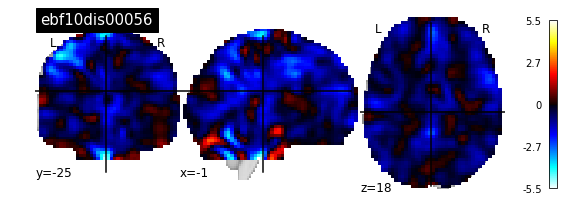

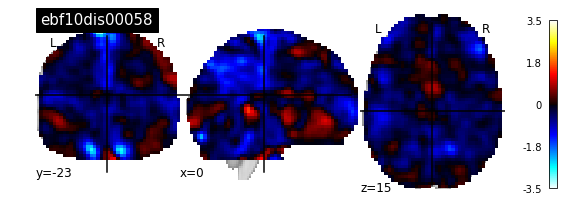

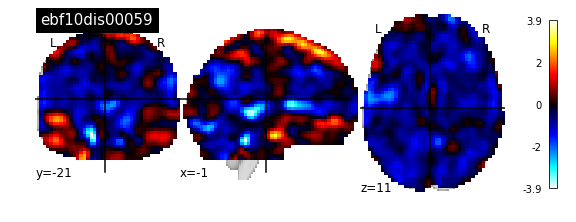

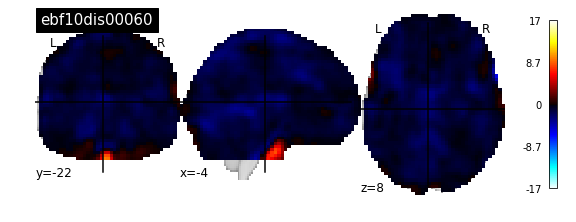

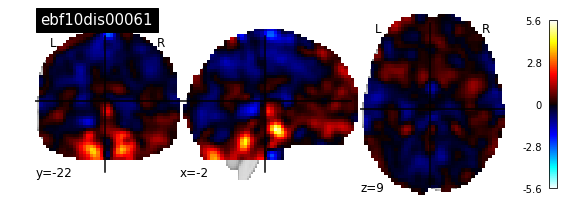

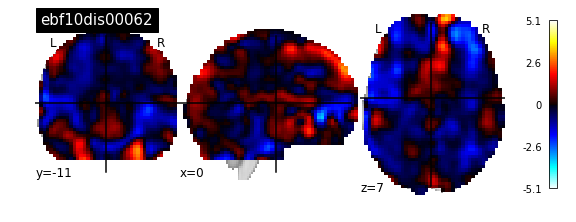

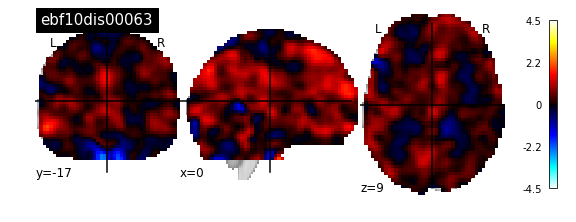

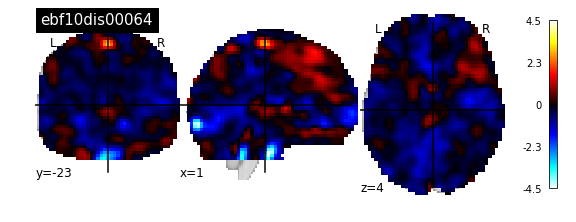

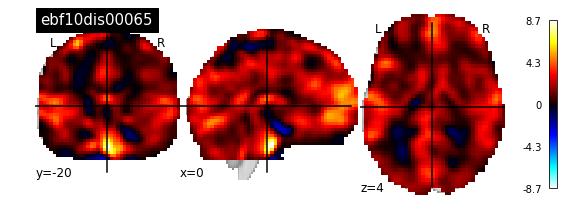

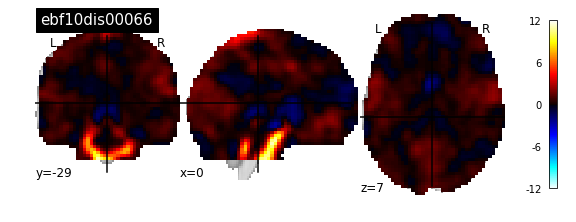

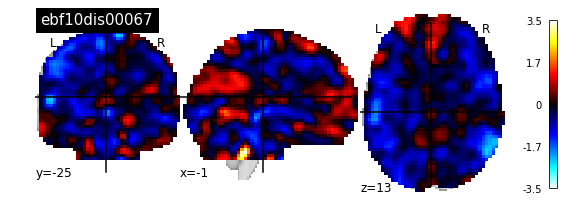

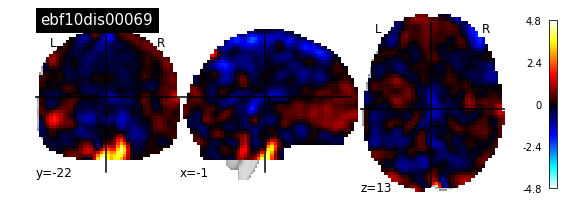

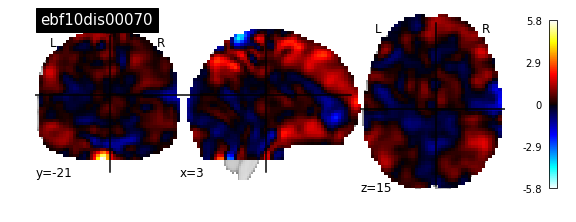

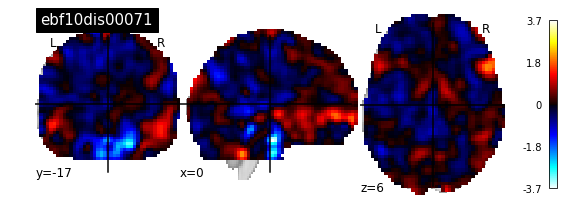

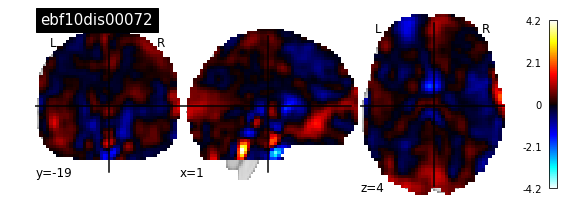

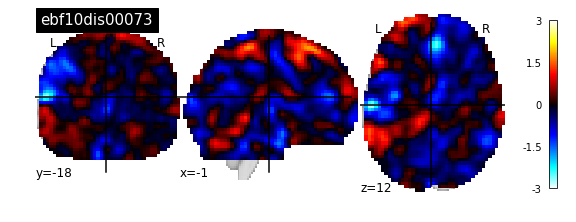

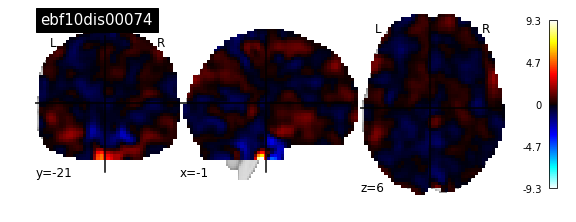

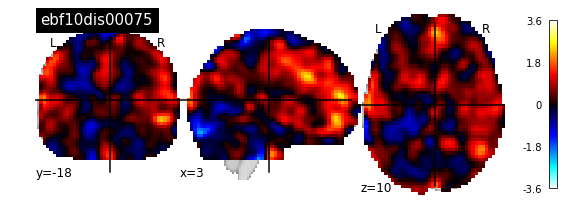

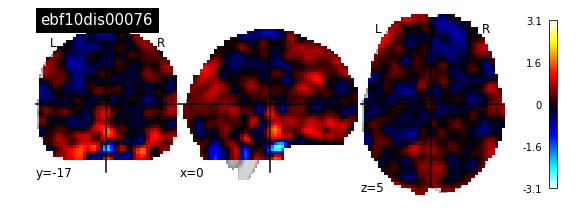

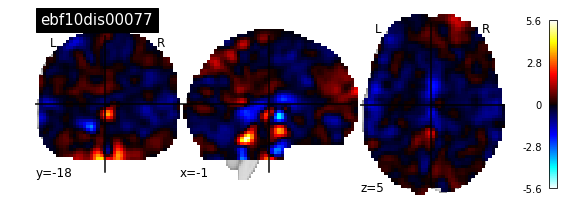

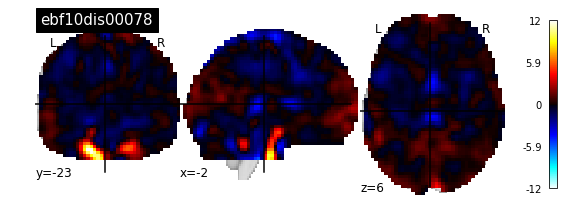

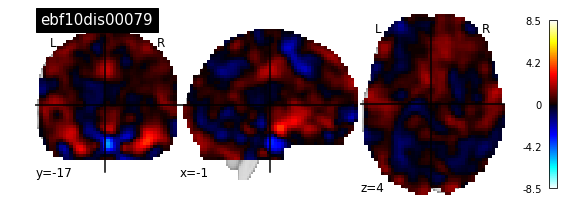

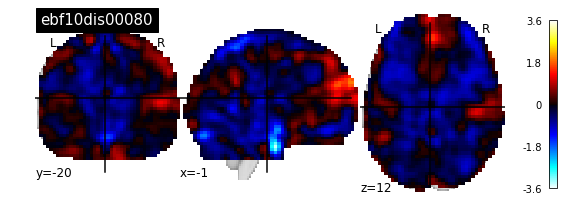

In [5]:
# inspect bad participants
for subj in subjects:
    print(plotting.plot_stat_map(first_level_model.format(subj, 'con_0006.hdr'), title = subj))
    plt.show()

## 1. Group level exclusion vs. inclusion map, modulated by habitual FB use

Threshold after controlling for FPR at 0.05 level is: 1.96


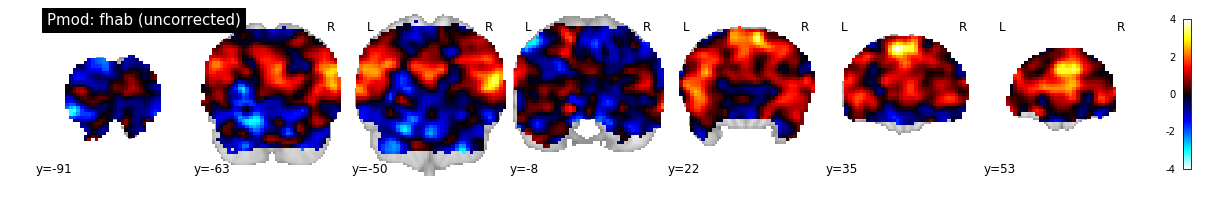

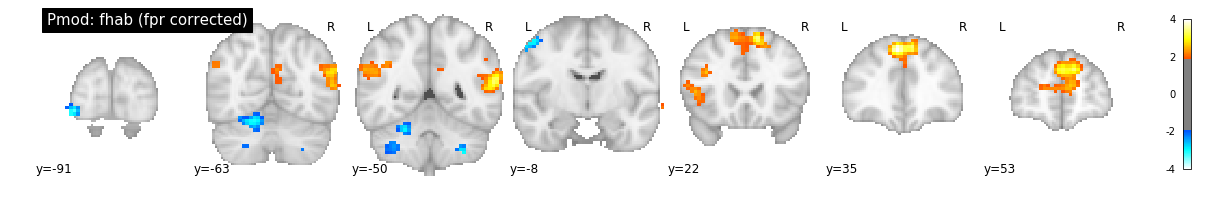

In [54]:
T3_map = plot_second_pmod(subjects, df,"fhab", con_files,"y", plot = True)
## Save the map
# nb.save(T3_map, '/data00/jupyterhub/rpei@asc.upenn.edu/socialMedia/SPM_firstLevelModel/second_level_maps/second_level_unfaire_fair_modulatedFHAB.nii')

## 2. Group level exclusion vs. inclusion map, modulated by Emotional FB use

Threshold after controlling for FPR at 0.05 level is: 1.96


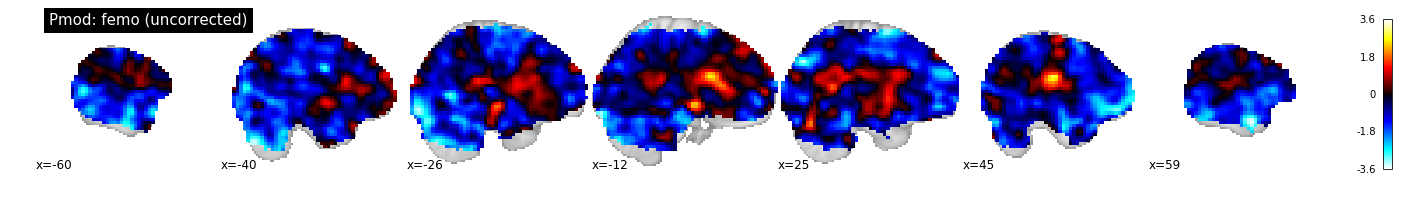

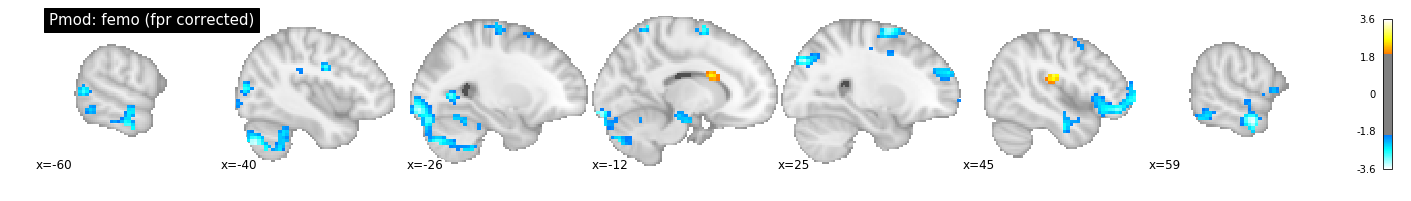

In [55]:
T3_map = plot_second_pmod(subjects, df,"femo", con_files, "x",plot = True)
## Save the map
# nb.save(T3_map, '/data00/jupyterhub/rpei@asc.upenn.edu/socialMedia/SPM_firstLevelModel/second_level_maps/second_level_unfaire_fair_modulated_femo.nii')

## 2. Group level exclusion vs. inclusion map, modulated by Emotional FB use

In [ ]:
T3_map = plot_second_pmod(subjects, df,"femo", con_files, "x",plot = True)
## Save the map
# nb.save(T3_map, '/data00/jupyterhub/rpei@asc.upenn.edu/socialMedia/SPM_firstLevelModel/second_level_maps/second_level_unfaire_fair_modulated_femo.nii')

## 3. Group level exclusion vs. inclusion map, modulated by FB connectedness

Threshold after controlling for FPR at 0.05 level is: 1.96


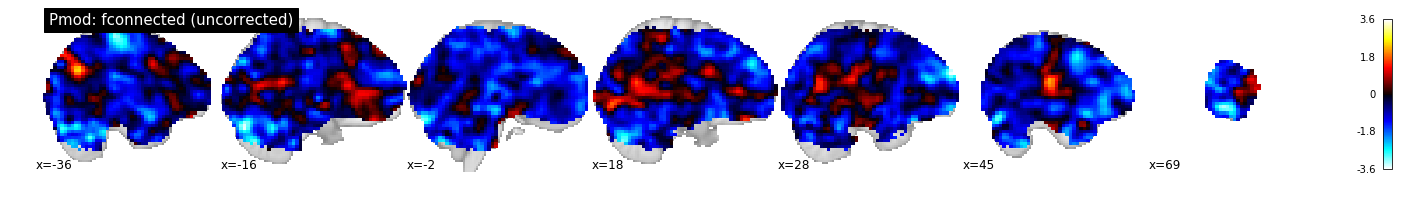

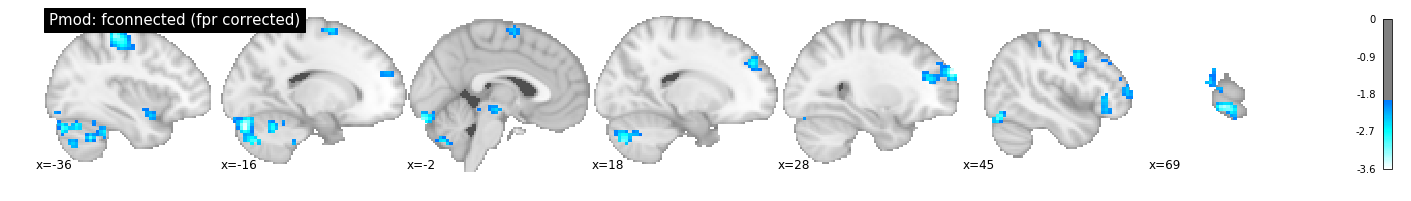

In [66]:
T3_map = plot_second_pmod(subjects, df,"fconnected", con_files,"x", plot = True)
## Save the map
# nb.save(T3_map, '/data00/jupyterhub/rpei@asc.upenn.edu/socialMedia/SPM_firstLevelModel/second_level_maps/second_level_unfaire_fair_modulatedFHAB.nii')

## 3. Group level exclusion vs. inclusion map, modulated by FB emotional posting

Threshold after controlling for FPR at 0.05 level is: 1.96


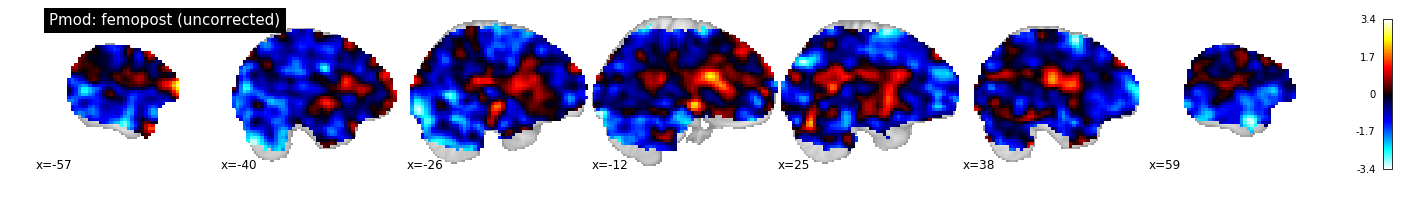

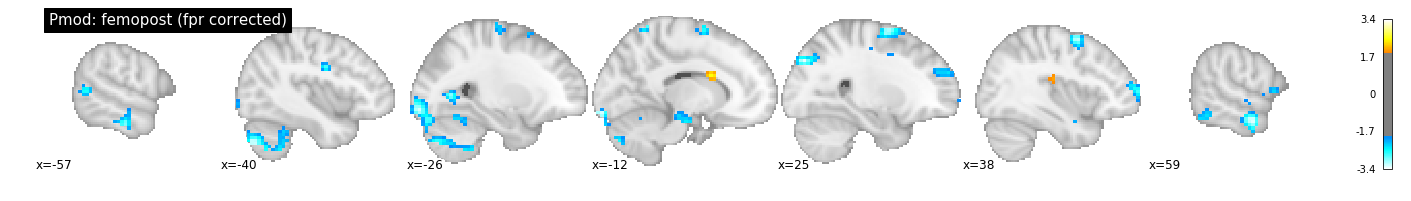

In [67]:
T3_map = plot_second_pmod(subjects, df,"femopost", con_files,"x", plot = True)
## Save the map
# nb.save(T3_map, '/data00/jupyterhub/rpei@asc.upenn.edu/socialMedia/SPM_firstLevelModel/second_level_maps/second_level_unfaire_fair_modulatedFHAB.nii')